In [1]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [2]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [3]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [4]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [5]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [6]:
# Data Preperation Module 4
# 2 Files in this module
# Module 4

module4ml = pd.read_csv('Module4-MoodleLogs.csv')

In [7]:
module4mg = pd.read_csv('Module4-MoodleGrades.csv')

In [8]:
print (module4mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Assignment: Upload 1 (Real)', 'Assignment: Upload 2 (Real)', 'Assignment: Upload 3 (Real)', 'Assignment: Upload 4 (Real)', 'Assignment: Upload 5 (Real)', 'Assignment: Upload 6 (Real)', 'Assignment: Upload 7 (Real)', 'Assignment: Overall grade feedback sheets (Real)', 'Assignment: SUBMIT HERE: Title and Purpose (Real)', 'Course total (Real)', 'Last downloaded from this course']


In [9]:
# Print the number of unique values in each modul4mg column
print(module4mg.nunique())

First name                                           64
Surname                                              64
ID number                                            64
Email address                                        64
Assignment: Upload 1 (Real)                           1
Assignment: Upload 2 (Real)                           1
Assignment: Upload 3 (Real)                           1
Assignment: Upload 4 (Real)                           1
Assignment: Upload 5 (Real)                           1
Assignment: Upload 6 (Real)                           1
Assignment: Upload 7 (Real)                           1
Assignment: Overall grade feedback sheets (Real)      1
Assignment: SUBMIT HERE: Title and Purpose (Real)    23
Course total (Real)                                  23
Last downloaded from this course                      1
dtype: int64


In [10]:
# Print the number of unique values in each modul4mg column
print(module4ml.nunique())

Time              1416
User full name      64
Affected user        1
Event context       20
Component            8
Event name          21
Description         80
Origin               2
IP address           1
dtype: int64


In [11]:
#time4
time4 = module4ml["Time"].str.split(",", n = 1, expand = True)

In [12]:
# making separate Date column from new data frame 
module4ml["Date"]= time4[0] 

# making seperate Time column from new data frame
module4ml['Time']= time4[1]


In [13]:
# Convert the date column to datetime64
module4ml.Date = pd.to_datetime(module4ml.Date)


In [14]:
len(module4ml)

2521

In [15]:
#Remove activity outside semester start and end dates range -Timeedit4
mask4 = (module4ml['Date'] >= StartDate) & (module4ml['Date'] <= EndDate)

module4ml = module4ml.loc[mask4]

len(module4ml)

1277

In [16]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_4 = (module4ml['Date'] >= StartDate) & (module4ml['Date'] <= TriOne)

FirstFive4 = module4ml.loc[week5_4]

len(FirstFive4)


606

In [17]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_4 = (module4ml['Date'] >= TriOne) & (module4ml['Date'] <= TriTwo)

FirstTen4 = module4ml.loc[week10_4]

len(FirstTen4)


353

In [18]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_4 = (module4ml['Date'] >= TriTwo) & (module4ml['Date'] <= EndDate)

FirstFivt4 = module4ml.loc[week15_4]

len(FirstFivt4)


375

In [19]:
#
module4ml = module4ml.drop(module4ml[['IP address','Origin','Description','Affected user']], axis=1)

In [20]:
module4ml.dtypes

Time                      object
User full name            object
Event context             object
Component                 object
Event name                object
Date              datetime64[ns]
dtype: object

In [21]:
module4ml.head(2)

,Time,User full name,Event context,Component,Event name,Date
24,14:26,aOmN bXsd,Course: Module 4,System,Course user report viewed,2019-01-03
68,11:08,aL20 blLY,Course: Module 4,System,Course viewed,2019-01-02


In [22]:
module4ml.columns

Index(['Time', 'User full name', 'Event context', 'Component', 'Event name',
       'Date'],
      dtype='object')

In [23]:
# new data frame with split value columns 
new4 = module4ml["User full name"].str.split(" ", n = 1, expand = True)


In [24]:
# making separate first name column from new data frame 
module4ml["First name"]= new4[0] 

# making separate last name column from new data frame 
module4ml["Last name"]= new4[1] 


In [25]:
module4ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
24,14:26,aOmN bXsd,Course: Module 4,System,Course user report viewed,2019-01-03,aOmN,bXsd
68,11:08,aL20 blLY,Course: Module 4,System,Course viewed,2019-01-02,aL20,blLY


In [26]:
m4ml_subset = module4ml

In [27]:
m4mg = module4mg[['First name', 'Surname', 'ID number', 'Assignment: SUBMIT HERE: Title and Purpose (Real)', 'Course total (Real)']]

In [28]:
module4ml_onehot = module4ml.copy()
module4ml_onehot = pd.get_dummies(module4ml_onehot, columns=['Event name'], prefix = ['Event name'])
module4ml_onehot = pd.get_dummies(module4ml_onehot, columns=['Event context'], prefix = ['Event context'])
module4ml_onehot = pd.get_dummies(module4ml_onehot, columns=['Component'], prefix = ['Component'])


print(module4ml_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data


      Time User full name       Date First name Last name  \
24   14:26      aOmN bXsd 2019-01-03       aOmN      bXsd   
68   11:08      aL20 blLY 2019-01-02       aL20      blLY   
69   11:07      aL20 blLY 2019-01-02       aL20      blLY   
70   11:07      aei9 bg2L 2019-01-02       aei9      bg2L   
71   11:07      aei9 bg2L 2019-01-02       aei9      bg2L   

    Event name_A file has been uploaded.  \
24                                     0   
68                                     0   
69                                     0   
70                                     0   
71                                     0   

    Event name_A submission has been submitted.  \
24                                            0   
68                                            0   
69                                            0   
70                                            0   
71                                            0   

    Event name_An online text has been uploaded.  \
24       

In [29]:
module4ml_onehot.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_An online text has been uploaded.,Event name_Course module instance list viewed,Event name_Course module viewed,...,Event context_File: Updated Module Brief,Event context_Forum: News forum,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Online text submissions,Component_Overview report,Component_System,Component_User report
24,14:26,aOmN bXsd,2019-01-03,aOmN,bXsd,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
68,11:08,aL20 blLY,2019-01-02,aL20,blLY,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:

#Engaged = > 55
disengaged4 = m4mg['Course total (Real)'] < 55


In [31]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
m4mg['disengaged'] = np.where(m4mg['Course total (Real)']<=55, '1', '0')


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
m4mg['disengaged'] = pd.to_numeric(m4mg['disengaged'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
print(m4mg['disengaged'].value_counts(dropna=False))

1    46
0    18
Name: disengaged, dtype: int64


In [36]:
spear1 = m4mg['Assignment: SUBMIT HERE: Title and Purpose (Real)']

In [37]:
spear2 = m4mg['disengaged']

In [38]:
spearcorr = stats.spearmanr(spear1,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.78593534719669556, pvalue=1.4428846142377697e-14)


In [34]:
m4mg_subset = m4mg

In [39]:
# Merge subset
merge_subset4 = pd.merge(module4ml_onehot,m4mg_subset[['First name','disengaged']],on='First name', how='left')

In [40]:
merge_subset4.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_An online text has been uploaded.,Event name_Course module instance list viewed,Event name_Course module viewed,...,Event context_Forum: News forum,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Online text submissions,Component_Overview report,Component_System,Component_User report,disengaged
0,14:26,aOmN bXsd,2019-01-03,aOmN,bXsd,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,11:08,aL20 blLY,2019-01-02,aL20,blLY,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [41]:
X4s = merge_subset4.iloc[:,5:50]  #independent columns
y4s = merge_subset4.iloc[:,-1]    #target column i.e engaged


In [42]:
X4s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_An online text has been uploaded.,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course user report viewed,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade overview report viewed,...,Event context_File: Updated Module Brief,Event context_Forum: News forum,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Online text submissions,Component_Overview report,Component_System,Component_User report
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
y4s.head(2)

0    1
1    1
Name: disengaged, dtype: int64

In [44]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X4s,y4s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X4s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                                Specs      Score
40                                    Component_Forum  17.300958
36                    Event context_Forum: News forum  16.090262
34       Event context_File: Ss - Self Directed Study  13.393810
8                        Event name_Discussion viewed  12.935601
38                                     Component_File  11.733429
23                             Event context_File: CB  10.499386
4                     Event name_Course module viewed   8.410056
20  Event context_Assignment: Upload your Assignme...   6.438134
29                            Event context_File: MOH   5.758192
10                Event name_Grade user report viewed   5.475393


[ 0.00730338  0.00022755  0.00139015  0.00641833  0.03420628  0.00069314
  0.01064257  0.01123622  0.04840763  0.00174295  0.02178628  0.00209984
  0.00552075  0.00033759  0.00763057  0.00102439  0.00094034  0.00337007
  0.00565688  0.01919851  0.06956738  0.01924917  0.00755155  0.06584756
  0.01590596  0.0411397   0.02348749  0.03371376  0.00329408  0.06991237
  0.00642164  0.03702702  0.00533209  0.020628    0.09541088  0.00260777
  0.04874135  0.00622671  0.04954119  0.02180534  0.05037462  0.00361801
  0.00231374  0.08085589  0.02959334]


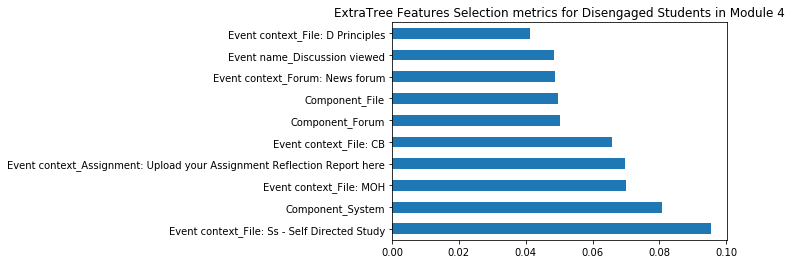

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X4s,y4s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X4s.columns)
plt.title('ExtraTree Features Selection metrics for Disengaged Students in Module 4')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


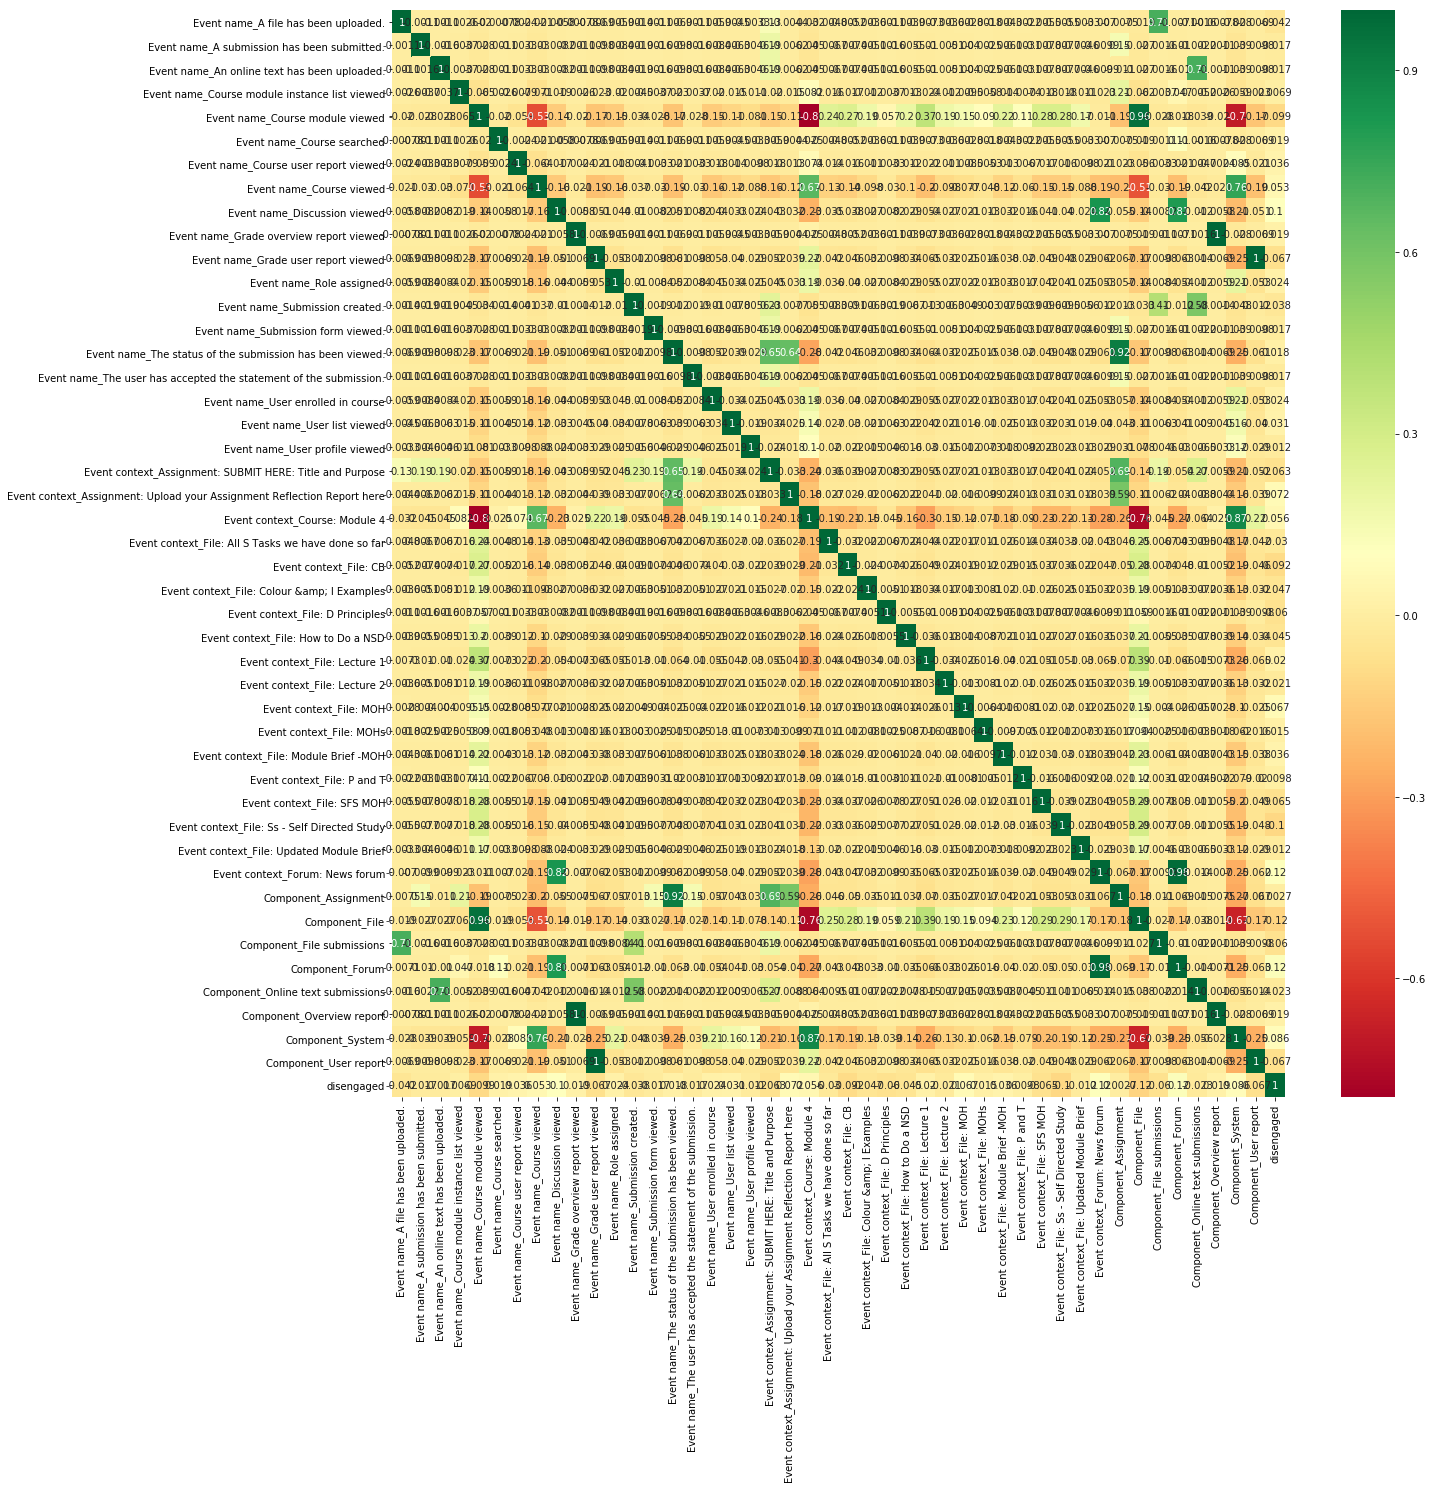

In [43]:

#get correlations of each features in dataset
corrmat = merge_subset4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset4[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [44]:
X4s.columns

Index(['Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_An online text has been uploaded.',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed', 'Event name_Course searched',
       'Event name_Course user report viewed', 'Event name_Course viewed',
       'Event name_Discussion viewed',
       'Event name_Grade overview report viewed',
       'Event name_Grade user report viewed', 'Event name_Role assigned',
       'Event name_Submission created.', 'Event name_Submission form viewed.',
       'Event name_The status of the submission has been viewed.',
       'Event name_The user has accepted the statement of the submission.',
       'Event name_User enrolled in course', 'Event name_User list viewed',
       'Event name_User profile viewed',
       'Event context_Assignment: SUBMIT HERE: Title and Purpose',
       'Event context_Assignment: Upload your Assignment Reflection Repo

In [ ]:
#40                                    Component_Forum  17.300958
#36                    Event context_Forum: News forum  16.090262
#34       Event context_File: Ss - Self Directed Study  13.393810
#8                        Event name_Discussion viewed  12.935601
#38                                     Component_File  11.733429
#23                             Event context_File: CB  10.499386
#4                     Event name_Course module viewed   8.410056
#20  Event context_Assignment: Upload your Assignme...   6.438134
#29                            Event context_File: MOH   5.758192
#10                Event name_Grade user report viewed   5.475393

In [53]:
featselect4 = X4s[['Component_Forum','Event context_Forum: News forum','Event context_File: Ss - Self Directed Study','Event name_Discussion viewed','Component_File','Event context_File: CB','Event name_Course module viewed','Event context_Assignment: Upload your Assignment Reflection Report here','Event context_File: MOH','Event name_Grade user report viewed']]

In [54]:
Xfs4 = featselect4 # Features
yfs4 = y4s # Target variable


In [55]:
# Split dataset into training set and test set
Xfs4_train, Xfs4_test, yfs4_train, yfs4_test = train_test_split(Xfs4, yfs4, test_size=0.3, random_state=1) # 70% training and 30% test


In [48]:
# Create Decision Tree classifer object
dtclffs4 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs4 = dtclffs4.fit(Xfs4_train,yfs4_train)

#Predict the response for test dataset
yfs4_pred = dtclffs4.predict(Xfs4_test)



In [49]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(dtclffs4, Xfs4_train, yfs4_train, cv = 10)
print(np.mean(cvscores_10))

0.699975031211


In [50]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg4 = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg4.fit(Xfs4_train, yfs4_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfslrdt4 = [logreg4, dtclffs4]


In [51]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(logreg4, Xfs4_train, yfs4_train, cv = 10)
print(np.mean(cvscores_10))

0.696604244694


In [52]:
# Instantiate the classifier
rfclffs4 = RandomForestClassifier()

# Fit to the training data
rfclffs4.fit(Xfs4_train, yfs4_train)

# Compute accuracy
print(rfclffs4.score(Xfs4_test, yfs4_test))


0.692708333333


In [53]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs4, Xfs4_train, yfs4_train, cv = 10)
print(np.mean(cvscores_10rf))

0.696604244694


In [54]:
from sklearn.svm import SVC

svcfs4 = SVC()

#Train it, or "fit it", to the data:
svcfs4.fit(Xfs4_train, yfs4_train)

# Compute accuracy
print(svcfs4.score(Xfs4_test, yfs4_test))


0.6875


In [55]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs4, Xfs4_train, yfs4_train, cv = 10)
print(np.mean(cvscores_10svc))

0.689850187266


In [56]:
# Review the decision regions of the two classifiers
#plot_labeled_decision_regions(Xfs4_test, yfs4_test, clflrdt4)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs4_test, yfs4_pred))


Accuracy: 0.692708333333


In [57]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs4_test, yfs4_pred))


0.707042253521


In [58]:
# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs4_test, yfs4_pred))


0.947169811321


In [59]:
print("Accuracy:",metrics.accuracy_score(yfs4_test, yfs4_pred))
print("Precision:",metrics.precision_score(yfs4_test, yfs4_pred))
print("Recall:",metrics.recall_score(yfs4_test, yfs4_pred))
print("F1 Score",metrics.f1_score(yfs4_test, yfs4_pred))


Accuracy: 0.692708333333
Precision: 0.707042253521
Recall: 0.947169811321
F1 Score 0.809677419355


In [60]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs4_test, yfs4_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs4_test, yfs4_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs4_test, yfs4_pred)))

Mean Absolute Error: 0.307291666667
Mean Squared Error: 0.307291666667
Root Mean Squared Error: 0.554338945652


In [112]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
logregfs4 = LogisticRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(logregfs4, Xfs4, yfs4, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(logregfs4, Xfs4, yfs4, cv = 10)
print(np.mean(cvscores_10))

0.684424192212
0.682872632836


In [115]:
logregfs4.fit(Xfs4_train,yfs4_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
# fit the model with data

ylg4_pred=logregfs4.predict(Xfs4_test)


In [62]:
# Instantiate the classifier
rfclffs4 = RandomForestClassifier()

# Fit to the training data
rfclffs4.fit(Xfs4_train, yfs4_train)

# Compute accuracy
print(rfclffs4.score(Xfs4_test, yfs4_test))


0.692708333333


In [63]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs4, Xfs4_train, yfs4_train, cv = 10)
print(np.mean(cvscores_10rf))

0.699950062422


In [64]:
from sklearn.svm import SVC

svcfs4 = SVC()

#Train it, or "fit it", to the data:
svcfs4.fit(Xfs4_train, yfs4_train)

# Compute accuracy
print(svcfs4.score(Xfs4_test, yfs4_test))


0.6875


In [65]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs4, Xfs4_train, yfs4_train, cv = 10)
print(np.mean(cvscores_10svc))

0.689850187266


In [118]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs4_test, ylg4_pred))
print(classification_report(yfs4_test, ylg4_pred))


[[  7 112]
 [  8 257]]
             precision    recall  f1-score   support

          0       0.47      0.06      0.10       119
          1       0.70      0.97      0.81       265

avg / total       0.63      0.69      0.59       384



In [120]:
# import the metrics class
from sklearn import metrics
cnflr4_matrix = metrics.confusion_matrix(yfs4_test, ylg4_pred)
cnflr4_matrix


array([[  7, 112],
       [  8, 257]], dtype=int64)

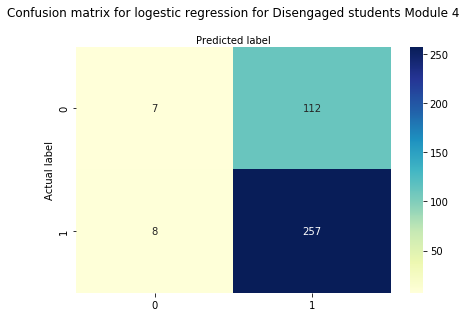

In [122]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnflr4_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for logestic regression for Disengaged students Module 4', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


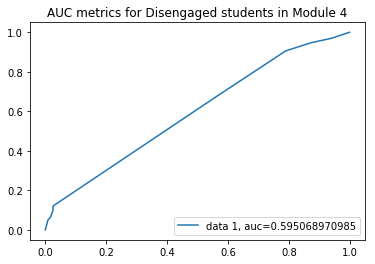

In [123]:
ylg4_pred_proba = logregfs4.predict_proba(Xfs4_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yfs4_test,  ylg4_pred_proba)
auc = metrics.roc_auc_score(yfs4_test, ylg4_pred_proba)
plt.title('AUC metrics for Disengaged students in Module 4')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.59. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


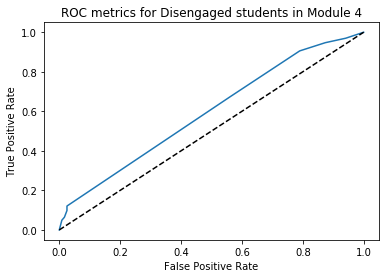

In [124]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yfs4_test, ylg4_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Disengaged students in Module 4')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [ ]:
#Trimester

In [56]:
FirstFive4.head(2)

,Time,User full name,Affected user,Event context,Component,Event name,Description,Origin,IP address,Date
350,23:19,amZd bJI1,-,Course: Module 4,System,Course viewed,The user with id '0' viewed the course with id...,web,127.0.0.1,2018-10-12
351,20:30,asqg bbCp,-,Course: Module 4,System,Course viewed,The user with id '0' viewed the course with id...,web,127.0.0.1,2018-10-12


In [57]:
FirstFive4 = FirstFive4.drop(FirstFive4[['IP address','Origin','Description','Affected user']], axis=1)


In [58]:
FirstFive4.head(2)

,Time,User full name,Event context,Component,Event name,Date
350,23:19,amZd bJI1,Course: Module 4,System,Course viewed,2018-10-12
351,20:30,asqg bbCp,Course: Module 4,System,Course viewed,2018-10-12


In [59]:
FirstFive4_onehot = FirstFive4.copy()
FirstFive4_onehot = pd.get_dummies(FirstFive4_onehot, columns=['Event name'], prefix = ['Event name'])
FirstFive4_onehot = pd.get_dummies(FirstFive4_onehot, columns=['Event context'], prefix = ['Event context'])
FirstFive4_onehot = pd.get_dummies(FirstFive4_onehot, columns=['Component'], prefix = ['Component'])


print(FirstFive4_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data



        Time User full name       Date  \
350    23:19      amZd bJI1 2018-10-12   
351    20:30      asqg bbCp 2018-10-12   
1516   15:23      aei9 bg2L 2018-10-11   
1737   20:03      azM9 bt8t 2018-10-22   
1738   20:02      azM9 bt8t 2018-10-22   

      Event name_Course module instance list viewed  \
350                                               0   
351                                               0   
1516                                              0   
1737                                              0   
1738                                              0   

      Event name_Course module viewed  Event name_Course searched  \
350                                 0                           0   
351                                 0                           0   
1516                                0                           0   
1737                                1                           0   
1738                                0                           0   

 

In [60]:
FirstFive4_onehot.head(2)

,Time,User full name,Date,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade user report viewed,Event name_Role assigned,...,Event context_File: Lecture 2,Event context_File: MOHs,Event context_File: P and T,Event context_File: SFS MOH,Event context_Forum: News forum,Component_Assignment,Component_File,Component_Forum,Component_System,Component_User report
350,23:19,amZd bJI1,2018-10-12,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
351,20:30,asqg bbCp,2018-10-12,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [61]:
# new data frame with split value columns 
new4a = FirstFive4_onehot["User full name"].str.split(" ", n = 1, expand = True)


In [62]:
# making separate first name column from new data frame 
FirstFive4_onehot["First name"]= new4a[0] 

# making separate last name column from new data frame 
FirstFive4_onehot["Last name"]= new4a[1] 


In [63]:
FirstFive4_onehot.head(2)

,Time,User full name,Date,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade user report viewed,Event name_Role assigned,...,Event context_File: P and T,Event context_File: SFS MOH,Event context_Forum: News forum,Component_Assignment,Component_File,Component_Forum,Component_System,Component_User report,First name,Last name
350,23:19,amZd bJI1,2018-10-12,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,amZd,bJI1
351,20:30,asqg bbCp,2018-10-12,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,asqg,bbCp


In [64]:
# Merge subset
merge_subset4_tri = pd.merge(FirstFive4_onehot,m4mg_subset[['First name','disengaged']],on='First name', how='left')

In [65]:
merge_subset4_tri.head(2)

,Time,User full name,Date,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade user report viewed,Event name_Role assigned,...,Event context_File: SFS MOH,Event context_Forum: News forum,Component_Assignment,Component_File,Component_Forum,Component_System,Component_User report,First name,Last name,disengaged
0,23:19,amZd bJI1,2018-10-12,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,amZd,bJI1,1
1,20:30,asqg bbCp,2018-10-12,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,asqg,bbCp,0


In [66]:
X54s = merge_subset4_tri.iloc[:,3:29]  #independent columns
y54s = merge_subset4_tri.iloc[:,-1]    #target column i.e engaged


In [67]:
X54s.head(2)

,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade user report viewed,Event name_Role assigned,Event name_The status of the submission has been viewed.,Event name_User enrolled in course,Event name_User list viewed,...,Event context_File: Lecture 2,Event context_File: MOHs,Event context_File: P and T,Event context_File: SFS MOH,Event context_Forum: News forum,Component_Assignment,Component_File,Component_Forum,Component_System,Component_User report
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [68]:
y54s.head(2)

0    1
1    0
Name: disengaged, dtype: int64

In [70]:

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X54s,y54s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X54s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36


                                                Specs     Score
22                                     Component_File  7.422653
23                                    Component_Forum  5.935036
1                     Event name_Course module viewed  5.632050
19                        Event context_File: SFS MOH  5.488730
20                    Event context_Forum: News forum  5.428320
4                        Event name_Discussion viewed  5.029802
16                      Event context_File: Lecture 2  4.521467
7   Event name_The status of the submission has be...  3.206770
11  Event context_Assignment: Upload your Assignme...  3.206770
21                               Component_Assignment  1.581430


[ 0.03111082  0.0810699   0.00123514  0.01187652  0.01355062  0.0019763
  0.00987418  0.04676636  0.00814535  0.02227955  0.00268032  0.00989753
  0.06303209  0.01536825  0.02732521  0.03158101  0.08180951  0.03167217
  0.01173401  0.0768157   0.06458642  0.05225074  0.134264    0.08481054
  0.0688134   0.01547435]


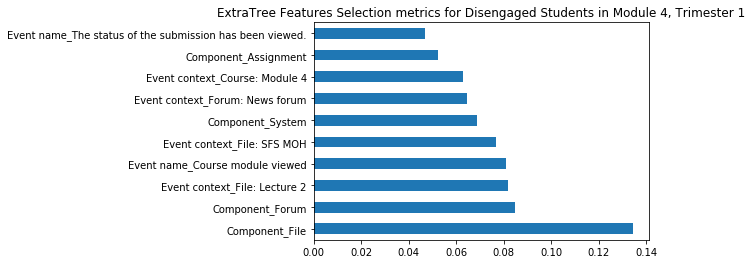

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X54s,y54s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X54s.columns)
plt.title('ExtraTree Features Selection metrics for Disengaged Students in Module 4, Trimester 1')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


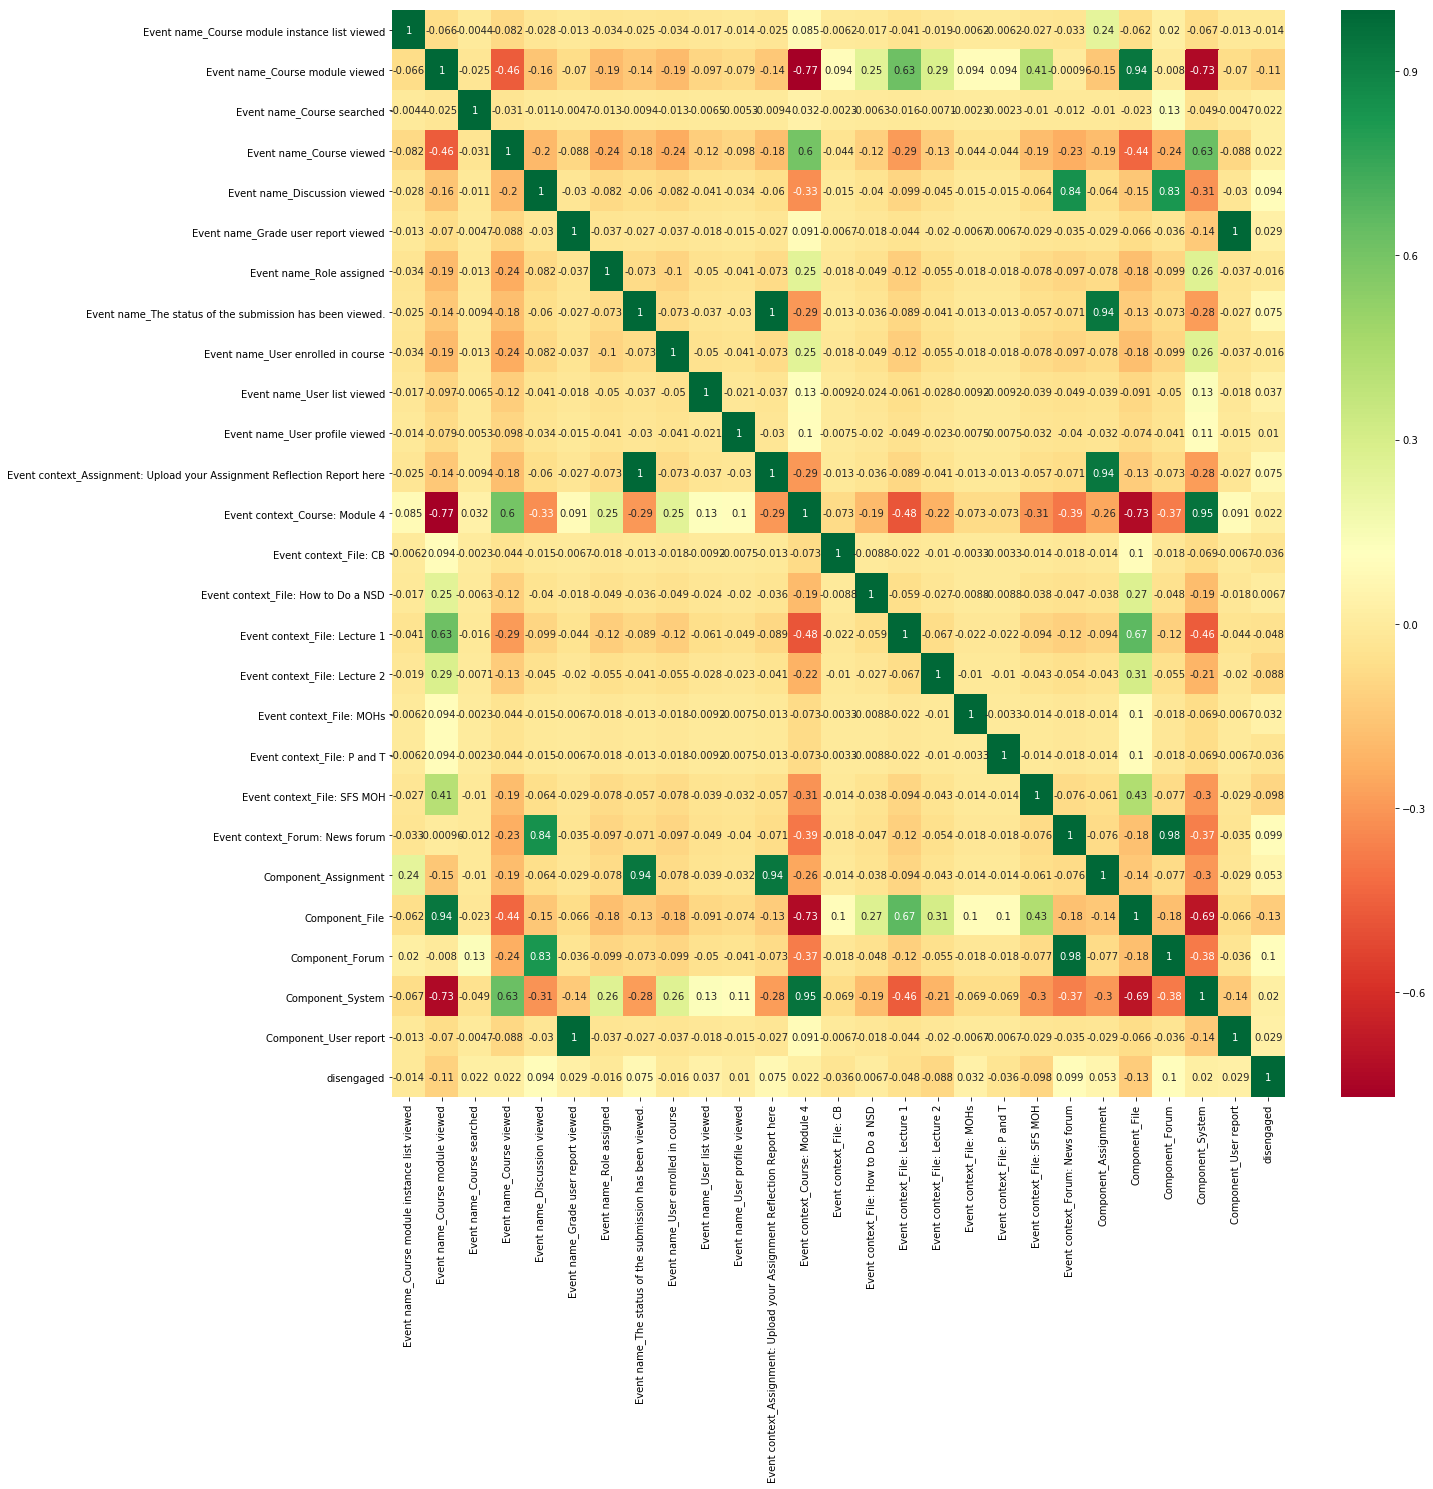

In [81]:
#get correlations of each features in dataset
corrmat = merge_subset4_tri.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset4_tri[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [82]:
X54s.columns

Index(['Event name_Course module instance list viewed',
       'Event name_Course module viewed', 'Event name_Course searched',
       'Event name_Course viewed', 'Event name_Discussion viewed',
       'Event name_Grade user report viewed', 'Event name_Role assigned',
       'Event name_The status of the submission has been viewed.',
       'Event name_User enrolled in course', 'Event name_User list viewed',
       'Event name_User profile viewed',
       'Event context_Assignment: Upload your Assignment Reflection Report here',
       'Event context_Course: Module 4', 'Event context_File: CB',
       'Event context_File: How to Do a NSD', 'Event context_File: Lecture 1',
       'Event context_File: Lecture 2', 'Event context_File: MOHs',
       'Event context_File: P and T', 'Event context_File: SFS MOH',
       'Event context_Forum: News forum', 'Component_Assignment',
       'Component_File', 'Component_Forum', 'Component_System',
       'Component_User report'],
      dtype='object

In [ ]:
#22                                     Component_File  7.422653
#23                                    Component_Forum  5.935036
#1                     Event name_Course module viewed  5.632050
#19                        Event context_File: SFS MOH  5.488730
#20                    Event context_Forum: News forum  5.428320
#4                        Event name_Discussion viewed  5.029802
#16                      Event context_File: Lecture 2  4.521467
#7   Event name_The status of the submission has be...  3.206770
#11  Event context_Assignment: Upload your Assignme...  3.206770
#21                               Component_Assignment  1.581430

In [83]:
feattime54 = X54s[['Component_File','Component_Forum','Event name_Course module viewed','Event context_File: SFS MOH','Event context_Forum: News forum','Event name_Discussion viewed','Event context_File: Lecture 2','Event name_The status of the submission has been viewed.','Event context_Assignment: Upload your Assignment Reflection Report here','Component_Assignment']]

In [84]:
Xt4a = feattime54 # Features
yt4a = y54s # Target variable

In [85]:
# Create training and testing sets
Xt4a_train, Xt4a_test, yt4a_train, yt4a_test = train_test_split(Xt4a, yt4a, test_size=0.3)


In [87]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregt4a = LogisticRegression()

# fit the model with data
logregt4a.fit(Xt4a_train,yt4a_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
yt4a_pred=logregt4a.predict(Xt4a_test)

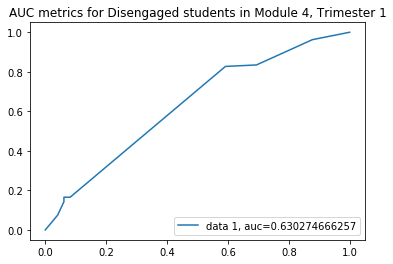

In [106]:
ylg4a_pred_proba = logregt4a.predict_proba(Xt4a_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt4a_test,  ylg4a_pred_proba)
auc = metrics.roc_auc_score(yt4a_test, ylg4a_pred_proba)
plt.title('AUC metrics for Disengaged students in Module 4, Trimester 1')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.63. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


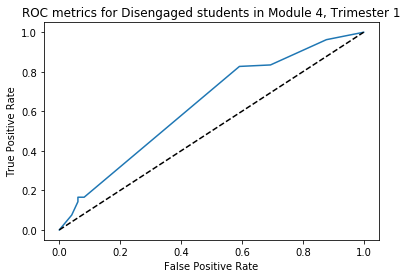

In [101]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yt4a_test, ylg4a_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Disengaged students in Module 4, Trimester 1')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [91]:
# Perform 10-fold CV
cvscores_4a = cross_val_score(logregt4a, Xt4a_train, yt4a_train, cv = 10)
print(np.mean(cvscores_4a))

0.783116883117


In [92]:
print("Accuracy:",metrics.accuracy_score(yt4a_test, yt4a_pred))
print("Precision:",metrics.precision_score(yt4a_test, yt4a_pred))
print("Recall:",metrics.recall_score(yt4a_test, yt4a_pred))
print("F1 Score",metrics.f1_score(yt4a_test, yt4a_pred))


Accuracy: 0.730769230769
Precision: 0.730769230769
Recall: 1.0
F1 Score 0.844444444444


In [93]:
# Instantiate the classifier
rfclffs4a = RandomForestClassifier()

# Fit to the training data
rfclffs4a.fit(Xt4a_train, yt4a_train)

# Compute accuracy
print(rfclffs4a.score(Xt4a_test, yt4a_test))


0.730769230769


In [94]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs4a, Xt4a_train, yt4a_train, cv = 10)
print(np.mean(cvscores_10rf))

0.783116883117


In [95]:
from sklearn.svm import SVC

svcfs4a = SVC()

#Train it, or "fit it", to the data:
svcfs4a.fit(Xt4a_train, yt4a_train)

# Compute accuracy
print(svcfs4a.score(Xt4a_test, yt4a_test))


0.730769230769


In [96]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs4a, Xt4a_train, yt4a_train, cv = 10)
print(np.mean(cvscores_10svc))

0.783116883117


In [98]:
# Create Decision Tree classifer object
dtclffs4a = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs4a = dtclffs4a.fit(Xt4a_train,yt4a_train)

#Predict the response for test dataset
yfs4a_pred = dtclffs4a.predict(Xt4a_test)


In [99]:
# Perform 10-fold CV
cvscores_10dt4a = cross_val_score(dtclffs4a, Xt4a_train, yt4a_train, cv = 10)
print(np.mean(cvscores_10dt4a))

0.778354978355


In [100]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt4a_test, yt4a_pred))
print(classification_report(yt4a_test, yt4a_pred))


[[  0  49]
 [  0 133]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        49
          1       0.73      1.00      0.84       133

avg / total       0.53      0.73      0.62       182



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [107]:
disengaged4.sum()

42

In [108]:
chi = stats.chisquare(disengaged4)
print(chi)

Power_divergenceResult(statistic=22.0, pvalue=0.99999965563682458)


In [110]:
# Test significance
alpha= 0.05
if chi[1] < alpha:
    print("Difference between engaged is statistically significant")
else:
    print("No significant difference between disengaged found")

No significant difference between disengaged found


In [50]:
Powerfeatselect4 = merge_subset4[['Component_Forum','Event context_Forum: News forum','Event context_File: Ss - Self Directed Study','Event name_Discussion viewed','Component_File','Event context_File: CB','Event name_Course module viewed','Event context_Assignment: Upload your Assignment Reflection Report here','Event context_File: MOH','Event name_Grade user report viewed','disengaged']]

In [51]:
Powerfeatselect4.groupby(['disengaged']).mean()

,Component_Forum,Event context_Forum: News forum,Event context_File: Ss - Self Directed Study,Event name_Discussion viewed,Component_File,Event context_File: CB,Event name_Course module viewed,Event context_Assignment: Upload your Assignment Reflection Report here,Event context_File: MOH,Event name_Grade user report viewed
disengaged,,,,,,,,,,
0,0.017857,0.017857,0.066327,0.010204,0.390306,0.058673,0.397959,0.007653,0.000000,0.081633
1,0.080226,0.076836,0.023729,0.054237,0.274576,0.022599,0.297175,0.031638,0.014689,0.047458


In [76]:
spear3 = Powerfeatselect4['Event context_File: Ss - Self Directed Study']

In [77]:
spear4 = Powerfeatselect4['disengaged']

In [78]:
spearcorr = stats.spearmanr(spear3,spear4)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.10435169521813577, pvalue=0.00018728834582631713)
